# 2021/11/09
The jupypter notebook is used to test the Megalodon result


In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [3]:
import pandas as pd
import numpy as np
import sys, os

# Load the data

In [4]:
input_path='/pod/2/li-lab/Ziwei/Nanopore/daily/test/'
#df=pd.read_csv(os.path.join(input_path, 'total.Megalodon.per_read.prob.bed.gz'),compression='gzip', sep='\t')
df=pd.read_csv(os.path.join(input_path, 'total.test.bed'), sep='\t')
print("Data is loading!")

df

Data is loading!


,chr,start,read_id,strand,5hmC_prob,5mC_prob,5C_prob,label
0,KJ477685.1,204,3e547b1a-0a3e-4475-9b70-0cbd7c8c82aa,-,0.435397,0.085058,0.479545,2
1,KJ477685.1,261,3e547b1a-0a3e-4475-9b70-0cbd7c8c82aa,-,0.342189,0.500821,0.156990,2
2,KJ477685.1,261,fe8be0cc-f4c4-49f1-80db-c840a6c7dfe9,-,0.577034,0.057676,0.365290,2
3,KJ477685.1,266,3e547b1a-0a3e-4475-9b70-0cbd7c8c82aa,-,0.065316,0.861569,0.073115,2
4,KJ477685.1,266,fe8be0cc-f4c4-49f1-80db-c840a6c7dfe9,-,0.794235,0.028885,0.176880,2
...,...,...,...,...,...,...,...,...
2492,J02459.1,60,bb826a6c-c88b-45ac-9984-8b9d6bfb2f11,-,0.054875,0.013023,0.932103,0
2493,J02459.1,60,bb91267a-6661-4248-a084-554f231398c1,-,0.030720,0.004392,0.964888,0
2494,J02459.1,60,bb9cee29-89d0-4a68-a4b4-8fe5c000289f,-,0.032703,0.006934,0.960363,0
2495,J02459.1,60,bbee6b4a-acac-4db9-bbb8-2f379918b146,-,0.035734,0.003182,0.961085,0


In [5]:
#Splitting the data into independent and dependent variables
df_feature = df.loc[:,['5hmC_prob','5mC_prob','5C_prob']]
df_class = df.loc[:,['label']].values
df_class = np.squeeze(df_class) #Convert the label into 1d-array

## Downsampling

In [127]:
X = df_feature
y = df_class
n = np.bincount(y)[-1]
key=[0,1,2]
value = [(1*n, 1*n, n)]
for i in value:
    sampling_strategy = dict(zip(key, i)).copy()

    from collections import Counter
from imblearn.under_sampling import EditedNearestNeighbours, RandomUnderSampler
sampler = RandomUnderSampler(random_state = 42, sampling_strategy=sampling_strategy)

X_res, y_res = sampler.fit_resample(X, y)

In [128]:
X_res.shape, y_res.shape

((1497, 3), (1497,))

In [130]:
(unique, counts) = np.unique(y_res, return_counts=True)
unique, counts

(array([0, 1, 2]), array([499, 499, 499]))

In [129]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res,
                                                    y_res,
                                                    test_size=0.2,
                                                    stratify=y_res,
                                                    random_state=42)
    
X_train.shape, X_test.shape

((1197, 3), (300, 3))

In [126]:
(unique, counts) = np.unique(y_test, return_counts=True)
unique, counts

(array([0, 1, 2]), array([100, 100, 100]))

In [30]:
### three way judge: https://stackoverflow.com/a/20033232
max_conditions = [
    (X[['5hmC_prob','5mC_prob','5C_prob']].max(axis=1) == df['5hmC_prob']),
    (df[['5hmC_prob','5mC_prob','5C_prob']].max(axis=1) == df['5mC_prob']),
    (df[['5hmC_prob','5mC_prob','5C_prob']].max(axis=1) == df['5C_prob'])
    ]

# create a list of the values we want to assign for each condition
values = [2, 1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df['pred_max_label'] = np.select(max_conditions, values)
df

,chr,start,read_id,strand,5hmC_prob,5mC_prob,5C_prob,label,pred_max_label
0,KJ477685.1,204,3e547b1a-0a3e-4475-9b70-0cbd7c8c82aa,-,0.435397,0.085058,0.479545,2,0
1,KJ477685.1,261,3e547b1a-0a3e-4475-9b70-0cbd7c8c82aa,-,0.342189,0.500821,0.156990,2,1
2,KJ477685.1,261,fe8be0cc-f4c4-49f1-80db-c840a6c7dfe9,-,0.577034,0.057676,0.365290,2,2
3,KJ477685.1,266,3e547b1a-0a3e-4475-9b70-0cbd7c8c82aa,-,0.065316,0.861569,0.073115,2,1
4,KJ477685.1,266,fe8be0cc-f4c4-49f1-80db-c840a6c7dfe9,-,0.794235,0.028885,0.176880,2,2
...,...,...,...,...,...,...,...,...,...
2492,J02459.1,60,bb826a6c-c88b-45ac-9984-8b9d6bfb2f11,-,0.054875,0.013023,0.932103,0,0
2493,J02459.1,60,bb91267a-6661-4248-a084-554f231398c1,-,0.030720,0.004392,0.964888,0,0
2494,J02459.1,60,bb9cee29-89d0-4a68-a4b4-8fe5c000289f,-,0.032703,0.006934,0.960363,0,0
2495,J02459.1,60,bbee6b4a-acac-4db9-bbb8-2f379918b146,-,0.035734,0.003182,0.961085,0,0


In [31]:
df_class.shape

(2497,)

In [32]:
y_true = np.squeeze(df.loc[:,['label']].values)
y_pred = np.squeeze(df.loc[:,['pred_max_label']].values)
confusion_matrix(y_true, y_pred)

array([[984,   0,  15],
       [ 31, 966,   2],
       [214, 150, 135]])

In [107]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

def plot_cm(y_true, y_pred, filename, label = ['5C', '5mC', '5hmC'], figsize=(10,10)):
    """
    Generate matrix plot of confusion matrix with annotations.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    cm = confusion_matrix(y_true, y_pred)
    # Normalise
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            s = cm_sum[i]
            annot[i, j] = '%.2f%%\n%d/%d' % (p, c, s)
    
    cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cmn = pd.DataFrame(cmn, index=label, columns=label)
    cmn.index.name = 'True label'
    cmn.columns.name = 'Predicted label'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cmn*100, annot=annot, fmt='', ax=ax, cmap="Blues", vmin=0, vmax=100)
#    plt.savefig(filename)

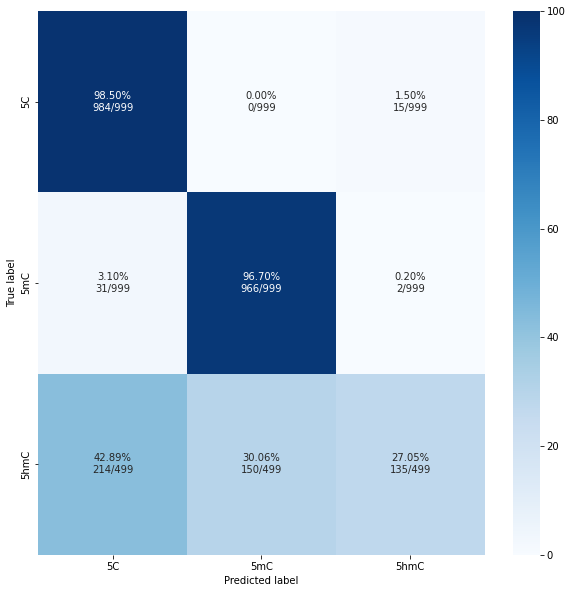

In [108]:
plot_cm(y_true, y_pred,'test.png')